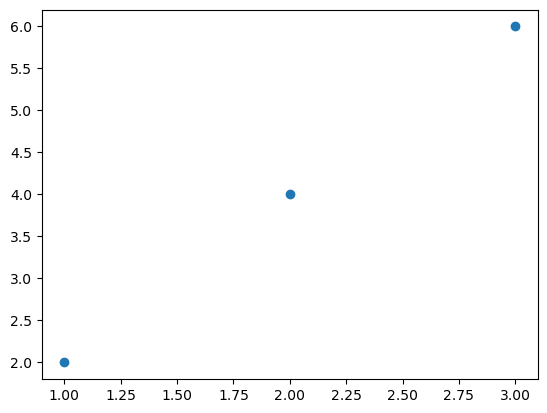

In [16]:
x = [1,2,3]
y = [2,4,6]
plt.scatter(x,y)

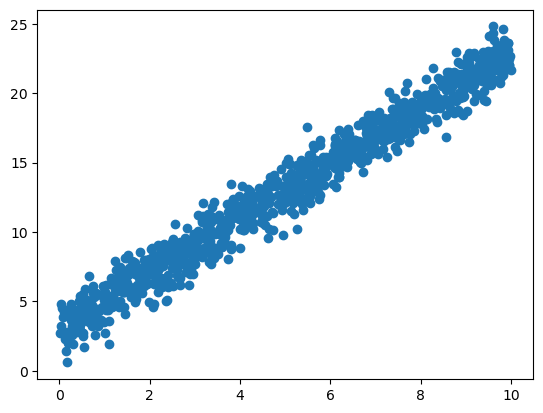

In [22]:
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import numpy as np
from statsmodels.stats.outliers_influence import variance_inflation_factor
import random 

#▶ 0부터 10까지의 실수 난수 생성

x1 = []
y1 = []

for i in range(1000):
    imsi = random.random() * 10
    #▶ 0부터 10까지의 실수 난수 생성
    x1.append(imsi)
    #▶ x1리스트에 imsi를 추가
    y1.append(2*imsi + 3 + random.gauss(0,1))
    #▶ y1리스트에 (a = 2*b + 3 + 에러(평균이 0이고 표준편차가 1인 정규분포(Gaussian Distribution)에서 난수를 생성))
    #y1.append(2*imsi + random.gauss(3,1))을 해도 똑같음
    
plt.scatter(x1, y1)
#▶ 0부터 10까지의 실수 난수 생성
    

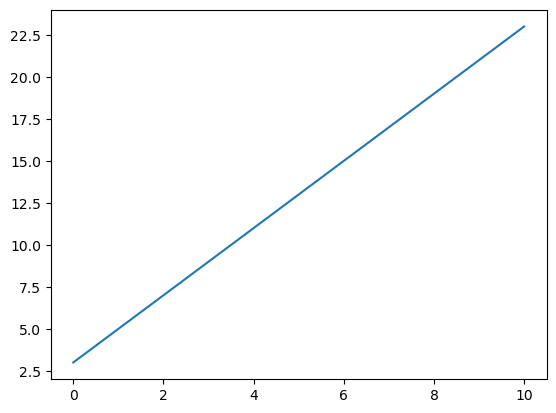

In [23]:
x2 = range(11)
y2 = [2 * n + 3 for n in range(11)]
plt.plot(x2, y2)

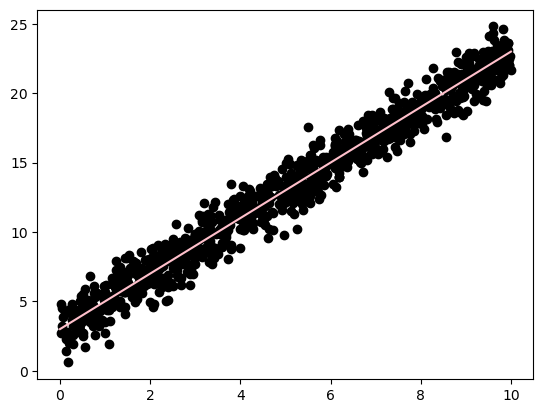

In [24]:
plt.scatter(x1, y1, c = "black")
plt.plot(x2, y2, c = "pink")
plt.show()

In [26]:
X = sm.add_constant(x1)
model = sm.OLS(y1,X)  # sm.OLS( 종속변수, 독립변수)
# 회귀모델 생성   *OLS : 가장 기본적인 회귀모델
result = model.fit()
# 

print(result.summary())

#참고 : https://tykimos.github.io/2017/03/25/Fit_Talk/

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.968
Model:                            OLS   Adj. R-squared:                  0.968
Method:                 Least Squares   F-statistic:                 3.057e+04
Date:                Mon, 19 Sep 2022   Prob (F-statistic):               0.00
Time:                        17:01:45   Log-Likelihood:                -1445.8
No. Observations:                1000   AIC:                             2896.
Df Residuals:                     998   BIC:                             2905.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.0339      0.066     46.109      0.0

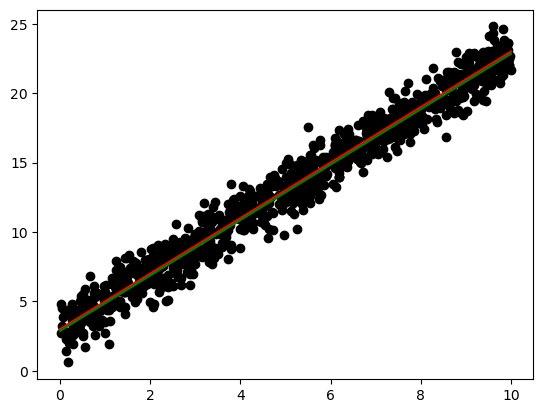

In [29]:
x3 = range(11)
y3 = [1.9976 * n + 2.8605 for n in x3]

plt.scatter(x1, y1, c = "black")
plt.plot(x2, y2, c = "red")
plt.plot(x3, y3, c = "green")

plt.show()

초록색이 빨강보다 더 적합한지 확인

- x1 : 원본 측정값
- x2 : 직접 지정한 값
- x3 : 회귀분석에 의해 도출된 값


In [34]:
score1 = 0
score2 = 0

for a, i in enumerate(x1):
    score1 += (y1[a] - (2 * i + 3)) ** 2
    score1 += (y1[a] - (1.9976 * i + 2.8605)) ** 2

print("임의설정 : " , score1 / len(x1))
print("회귀분석 : " , score2 / len(x1))

임의설정 :  2.129860098602365
회귀분석 :  0.0


다중공선성

In [43]:
x4 = []
x4_1 = []
y4 = []
for i in range(1000):
    imsi = random.random() * 10
    x4.append(imsi)
    x4_1.append(imsi + random.gauss(0,1))
    y4.append(2*imsi + random.gauss(3,2))

df = {"x4" : x4, "x4_1" : x4_1, "y4" : y4 }
df = pd.DataFrame(df)

x4 = df[["x4", "x4_1"]]
# x4 = df[["x4_1"]]
y4 = df["y4"]

x4 = sm.add_constant(x4, has_constant="add")
model = sm.OLS(y4, x4)
result = model.fit()

print(result.summary())

#x4와 4_1은 다중공선성을 가지기 때문에 x4를 상제하면 X4_1이 X4처럼 되는 것임


                            OLS Regression Results                            
Dep. Variable:                     y4   R-squared:                       0.896
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     4303.
Date:                Mon, 19 Sep 2022   Prob (F-statistic):               0.00
Time:                        17:30:51   Log-Likelihood:                -2087.3
No. Observations:                1000   AIC:                             4181.
Df Residuals:                     997   BIC:                             4195.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.1934      0.126     25.360      0.0

In [42]:
df.corr()
# 상관관계 행렬을 보는 방법

,x4,x4_1,y4
x4,1.000000,0.948366,0.945911
x4_1,0.948366,1.000000,0.900760
y4,0.945911,0.900760,1.000000


VIF

In [44]:
for i in range(len(model.exog_names)):
    print(model.exog_names[i], variance_inflation_factor(model.exog, i))

const 4.15335745255777
x4 9.670481949393462
x4_1 9.670481949393471
